In [171]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import covid19

In [173]:
lut_path = 'UID_ISO_FIPS_LookUp_Table.csv'
# lut_path = covid19.data.download('LUT', repo='world')
lut_path

'UID_ISO_FIPS_LookUp_Table.csv'

In [174]:
deaths_path = 'time_series_covid19_deaths_global.csv'
deaths_path = covid19.data.download('deaths', repo='world')
confirmed_path = 'time_series_covid19_confirmed_global.csv'
confirmed_path = covid19.data.download('confirmed', repo='world')
deaths_path, confirmed_path

('time_series_covid19_deaths_global.csv',
 'time_series_covid19_confirmed_global.csv')

In [175]:
world = covid19.data.read_jhu_global(deaths_path, lut_path=lut_path)
# world['confirmed'] = covid19.data.read_jhu_global(confirmed_path)['confirmed']
world['daily_deaths'] = world['deaths'].diff('time')
world['mortality'] = world['deaths'] / world.population * 100_000
world['daily_mortality'] = world['daily_deaths'] / world.population * 100_000
world['daily_deaths7'] = world['daily_deaths'].rolling({'time': 7}).mean()
world['daily_mortality7'] = world['daily_mortality'].rolling({'time': 7}).mean()
world = world.drop(['lat', 'lon'])
world

<xarray.Dataset>
Dimensions:           (location: 266, time: 141)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-06-10
    country           (location) <U32 'Afghanistan' 'Albania' ... 'Lesotho'
  * location          (location) <U46 'Afghanistan' 'Albania' ... 'Lesotho'
    state_region      (location) <U46 'Afghanistan / ' ... 'Lesotho / '
    population        (location) float64 3.893e+07 2.878e+06 ... 2.142e+06
Data variables:
    deaths            (time, location) int64 0 0 0 0 0 0 0 ... 1 12 129 2 48 0
    daily_deaths      (time, location) float64 nan nan nan nan ... 0.0 0.0 0.0
    mortality         (time, location) float64 0.0 0.0 0.0 ... 0.23 0.5033 0.0
    daily_mortality   (time, location) float64 nan nan nan nan ... 0.0 0.0 0.0
    daily_deaths7     (time, location) float64 nan nan nan nan ... 0.0 0.0 0.0
    daily_mortality7  (time, location) float64 nan nan nan ... -2.726e-18 0.0

In [176]:
world_latest = world.isel(time=-1)
world_latest = world_latest.sortby(-world_latest['daily_mortality7'])
world_latest.sel(location=world_latest['deaths'] > 300).sortby(-world_latest['mortality']).to_dataframe().reset_index()

,location,time,country,state_region,population,deaths,daily_deaths,mortality,daily_mortality,daily_deaths7,daily_mortality7
0,Belgium,2020-06-10,Belgium,Belgium /,1.158962e+07,9629,10.0,83.082994,0.086284,15.285714,0.131891
1,United Kingdom,2020-06-10,United Kingdom,United Kingdom /,6.788600e+07,41128,245.0,60.583917,0.360899,200.000000,0.294612
2,Spain,2020-06-10,Spain,Spain /,4.675478e+07,27136,0.0,58.038982,0.000000,1.142857,0.002444
3,Italy,2020-06-10,Italy,Italy /,6.046183e+07,34114,71.0,56.422376,0.117429,73.285714,0.121210
4,Sweden,2020-06-10,Sweden,Sweden /,1.009927e+07,4795,78.0,47.478679,0.772333,36.142857,0.357876
5,France,2020-06-10,France,France /,6.527351e+07,29260,23.0,44.826759,0.035236,41.857143,0.064126
6,Netherlands,2020-06-10,Netherlands,Netherlands /,1.713487e+07,6042,11.0,35.261423,0.064197,9.285714,0.054192
7,Ireland,2020-06-10,Ireland,Ireland /,4.937796e+06,1695,4.0,34.327056,0.081008,5.142857,0.104153
8,US,2020-06-10,US,US /,3.294663e+08,112924,935.0,34.274827,0.283792,823.285714,0.249885
9,Switzerland,2020-06-10,Switzerland,Switzerland /,8.654618e+06,1936,2.0,22.369560,0.023109,2.142857,0.024760


In [177]:
world_latest.sel(location=world_latest['deaths'] > 300).to_dataframe().reset_index()[['location', 'time', 'population', 'daily_mortality7']]

,location,time,population,daily_mortality7
0,Chile,2020-06-10,1.911621e+07,0.896771
1,Brazil,2020-06-10,2.125594e+08,0.479328
2,Peru,2020-06-10,3.297185e+07,0.437170
3,Mexico,2020-06-10,1.277923e+08,0.405569
4,Sweden,2020-06-10,1.009927e+07,0.357876
5,United Kingdom,2020-06-10,6.788600e+07,0.294612
6,US,2020-06-10,3.294663e+08,0.249885
7,Moldova,2020-06-10,4.033963e+06,0.216023
8,Ecuador,2020-06-10,1.764306e+07,0.189472
9,Panama,2020-06-10,4.314768e+06,0.185410


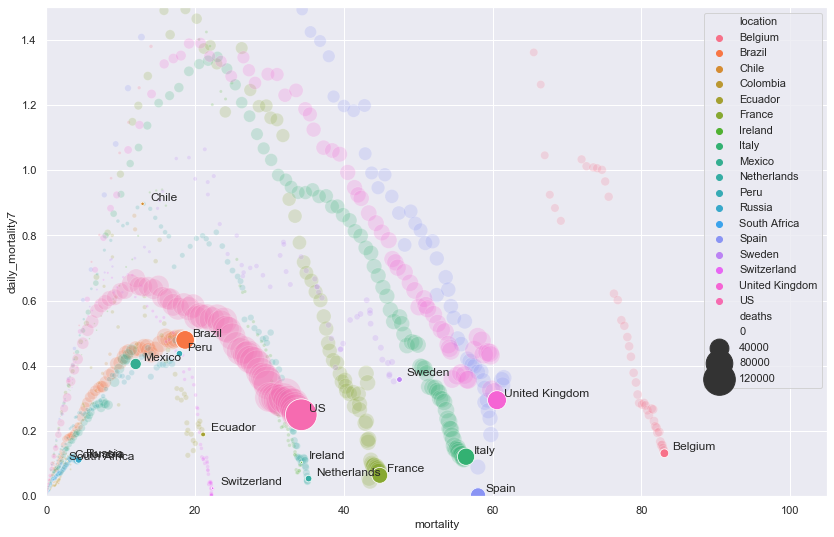

In [178]:
import seaborn as sns
sns.set()
world_hit = world.sel(location=(((world['daily_mortality7'].isel(time=-1) > .1) | (world['mortality'] > 20).any('time')) & (world['deaths'] > 1000)).any('time')).to_dataframe().reset_index()
ax = sns.scatterplot(x="mortality", y="daily_mortality7", hue="location", size="deaths", data=world_hit, alpha=0.2, sizes=(0, 1_000))
ax = sns.scatterplot(x="mortality", y="daily_mortality7", hue="location", size="deaths", data=world_hit[world_hit['time']==world_hit['time'].max()], sizes=(0, 1_000), legend=False)
_ = ax.set(ylim=(0, 1.5), xlim=(0, 105))
for index in world_hit[world_hit['time']==world_hit['time'].max()].index:
    record = world_hit.loc[index]
    ax.annotate(record['location'], (record['mortality'] + 1, record['daily_mortality7'] + .01))

In [166]:
world.sel(location='Spain')['daily_deaths']

<xarray.DataArray 'daily_deaths' (time: 140)>
array([       nan,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  1.000e+00,  1.000e+00,  1.000e+00,  2.000e+00,
        5.000e+00,  7.000e+00,  1.100e+01,  7.000e+00,  1.900e+01,
        1.000e+00,  7.800e+01,  6.200e+01,  9.400e+01,  5.300e+01,
        1.910e+02,  9.000e+01,  2.070e+02,  2.130e+02,  3.320e+02,
        3.970e+02,  5.390e+02,  4.970e+02,  8.390e+02,  7.180e+02,
        7.730e+02,  8.440e+02,  8.210e+02,  9.130e+02,  7.480e+02,
        9.230e+02,  9.610e+02,  8.500e+02,  7.490e+02,  6.940e+02,
        7.000e+02,  7.040e+02,  7.470e+02,  6.550e+02,  6.340e+02,
        5.250e+02,  6.030e+02,  5.470e+02,  3.000e+02,  6.520e+02,
        6.070e+02,  6.870e+02,  4.100e+01,  4.100e+02,  3.990e+02,
        4.300e+02,  4.350e+02,  4.400e+02,  3.670e+02,  3.780e+02,
        2.880e+02,  3.310e+02,  3.010e+02,  4.530e+02,  2.680e+02,
        0.000e+00,  5.570e+02,  1.640e+02,  1.640e+02,  1.850e+02,
        2.440e+02,  2.130e+02,  2.290e+02,  1.790e+02,  1.430e+02,
        1.230e+02,  1.760e+02,  1.840e+02,  2.170e+02,  1.380e+02,
        1.040e+02,  0.000e+00,  1.460e+02,  6.900e+01,  1.100e+02,
        5.200e+01,  6.880e+02,  5.000e+01,  7.400e+01, -1.918e+03,
        2.830e+02,  0.000e+00,  2.000e+00,  2.000e+00,  4.000e+00,
        2.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  5.000e+00,
        1.000e+00,  1.000e+00,  1.000e+00,  0.000e+00,  0.000e+00])
Coordinates:
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-06-09
    country       <U32 'Spain'
    location      <U46 'Spain'
    state_region  <U46 'Spain / '
    population    float64 4.675e+07

In [167]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

SHOWUNTIL = np.datetime64(world.time.values[-1], 's') + 10 * DAY

EXTENT = ('2020-02-20', SHOWUNTIL)
XLIM = tuple(map(np.datetime64, EXTENT))
XLIM_S = tuple([np.datetime64(d) + 10 * DAY for d in EXTENT])

In [21]:
PARAMS = {
    'China / Hubei': -36,
    'Iran': -2,
    'Korea, South': -1,
    'Italy': 0,
#     'EU': 0,
    'Spain': 5,
    'France': 11,
    'US': 12,
    'Japan': 13,
    'United Kingdom': 14,
    'Netherlands': 16,
    'Germany': 18,
    'Switzerland': 18,
    'Philippines': 18,
    'Indonesia': 19,
    'Belgium': 20,
    'Turkey': 21,
    'Brazil': 21,
    'Sweden': 23,
    'Algeria': 23,
    'Austria': 24,
    'Portugal': 24,
    'Ecuador': 24,
    'India': 29,
    'Canada / Ontario': 29,
    'Canada / Quebec': 30,
    'Mexico': 31,
    'Russia': 33,
}

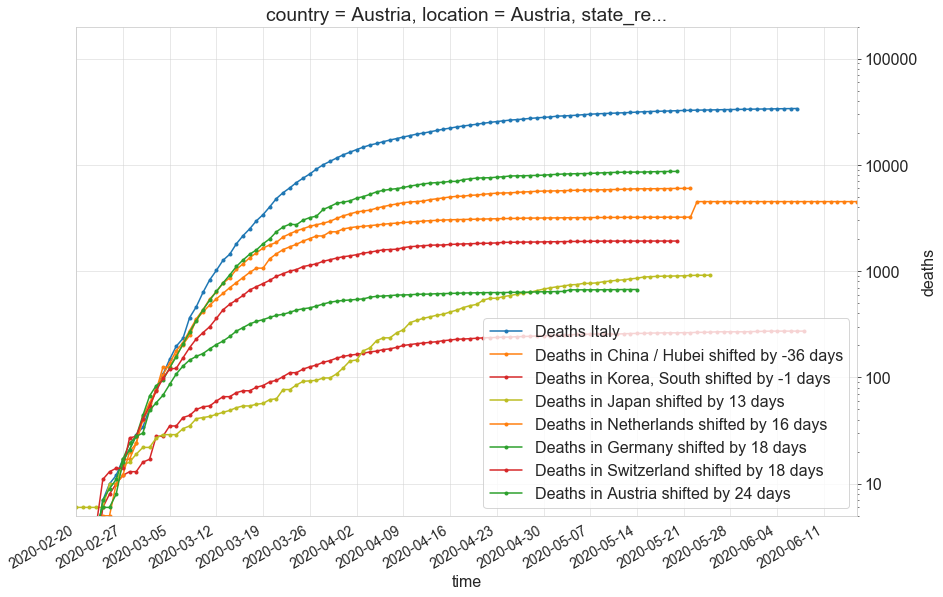

In [22]:
_, ax = covid19.plot.subplots(subplot_kw={'yscale': 'log', 'ylim': (5, 200000), 'xlim': XLIM}, figsize=(14, 9))
covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country not in ['Germany', 'Switzerland', 'Austria', 'Netherlands', 'Korea, South', 'Japan', 'China / Hubei']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color)
_ = ax.legend()

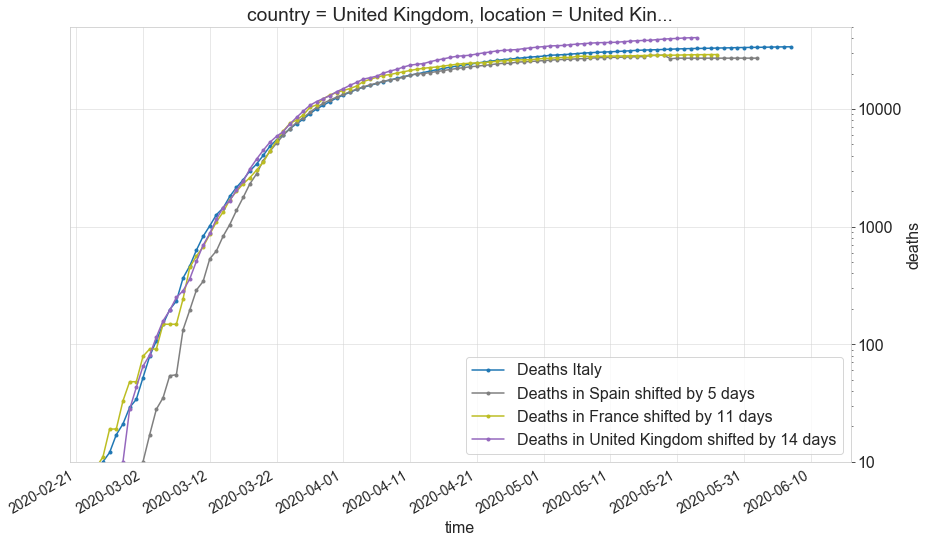

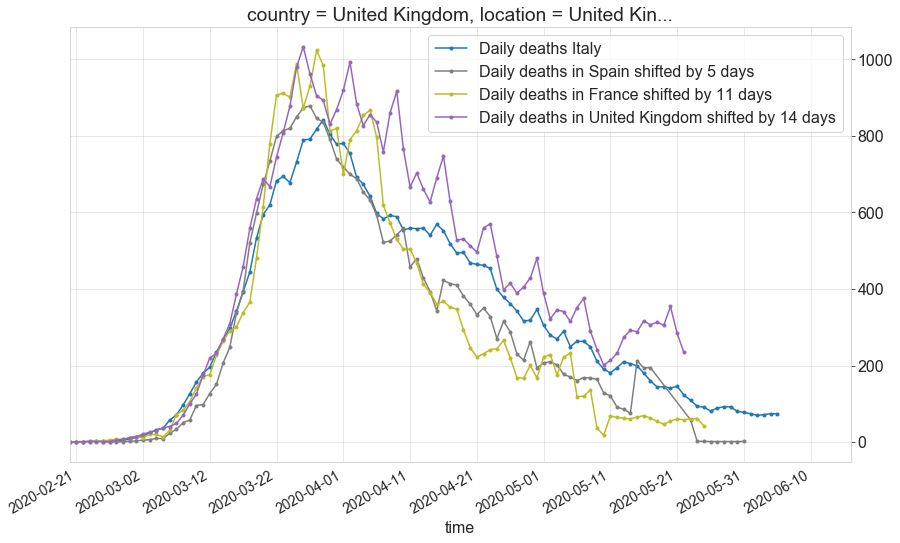

In [23]:
_, ax = covid19.plot.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 50000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
_, ax1 = covid19.plot.subplots(subplot_kw={
    'xlim': XLIM
}, figsize=(14, 8))

covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
covid19.plot.plot_data(ax1, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['France', 'United Kingdom', 'Spain']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
    covid19.plot.plot_data(ax1, world.sel(location=country)['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
_ = ax.legend()
_ = ax1.legend()

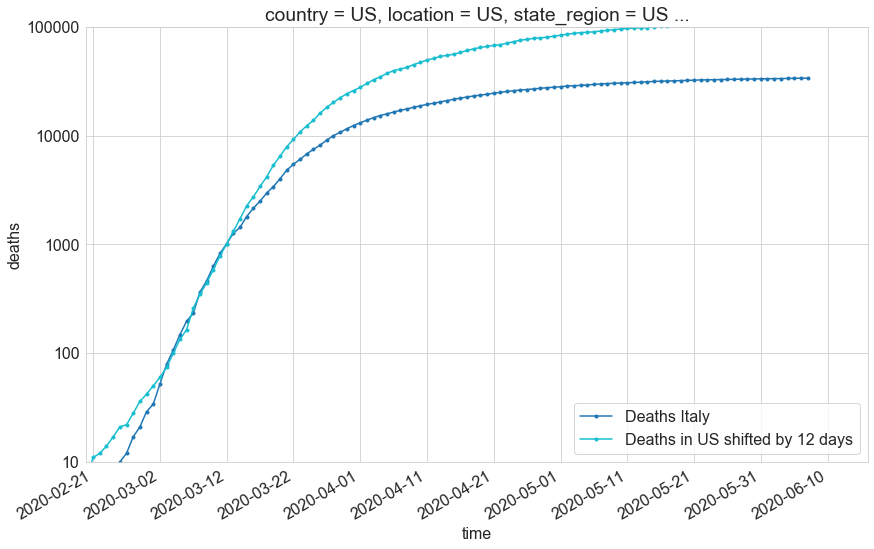

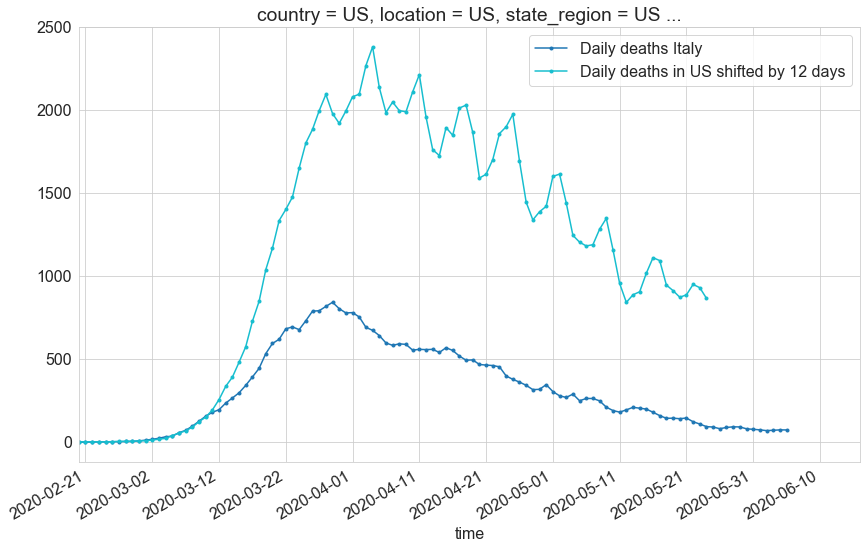

In [24]:
_, ax = plt.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 100000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
_, ax1 = plt.subplots(subplot_kw={
    'xlim': XLIM
}, figsize=(14, 8))

covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
covid19.plot.plot_data(ax1, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['US']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
    covid19.plot.plot_data(ax1, world.sel(location=country)['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
_ = ax.legend()
_ = ax1.legend()

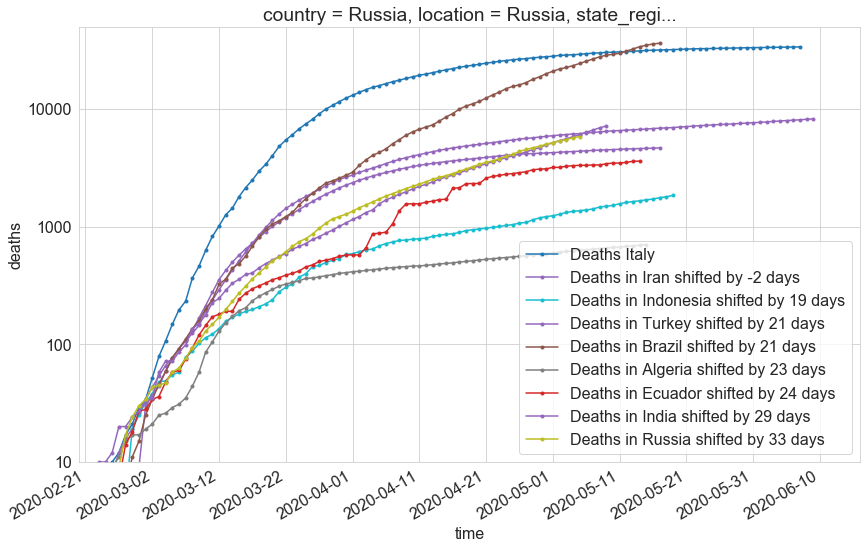

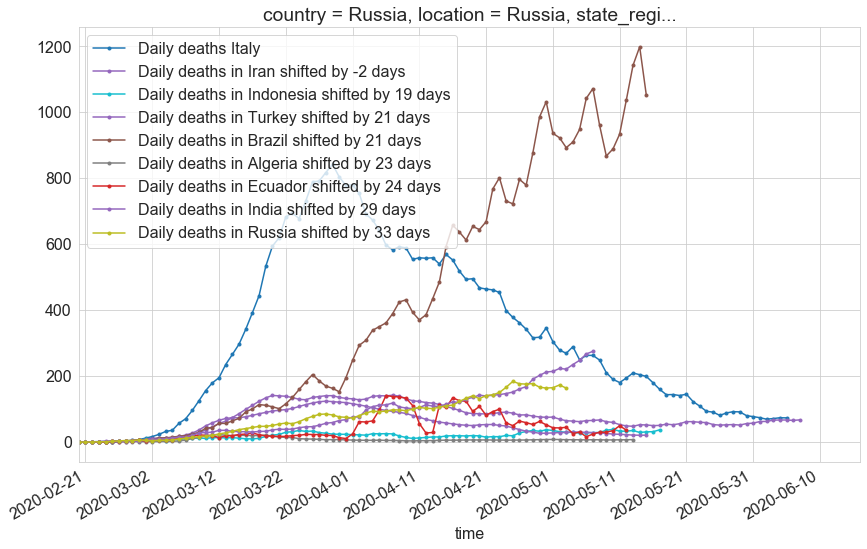

In [25]:
_, ax = plt.subplots(subplot_kw={
    'yscale': 'log',
    'ylim': (10, 50000),
    # 'ylim': (0, country_data['France']['deaths'].max() * 1.1),
    'xlim': XLIM
}, figsize=(14, 8))
_, ax1 = plt.subplots(subplot_kw={
    'xlim': XLIM
}, figsize=(14, 8))

covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0])
covid19.plot.plot_data(ax1, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths Italy', color=PALETTE_ONE[0])
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[3:])):
    if country not in ['Iran', 'Brazil', 'Turkey', 'India', 'Indonesia', 'Ecuador', 'Algeria', 'Russia']:
        continue
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
    covid19.plot.plot_data(ax1, world.sel(location=country)['daily_deaths'].rolling({'time': 5}, center=True).mean(), label=f'Daily deaths in {country} shifted by {delay} days', delay=-delay, color=color, date_interval=10)
_ = ax.legend()
_ = ax1.legend()

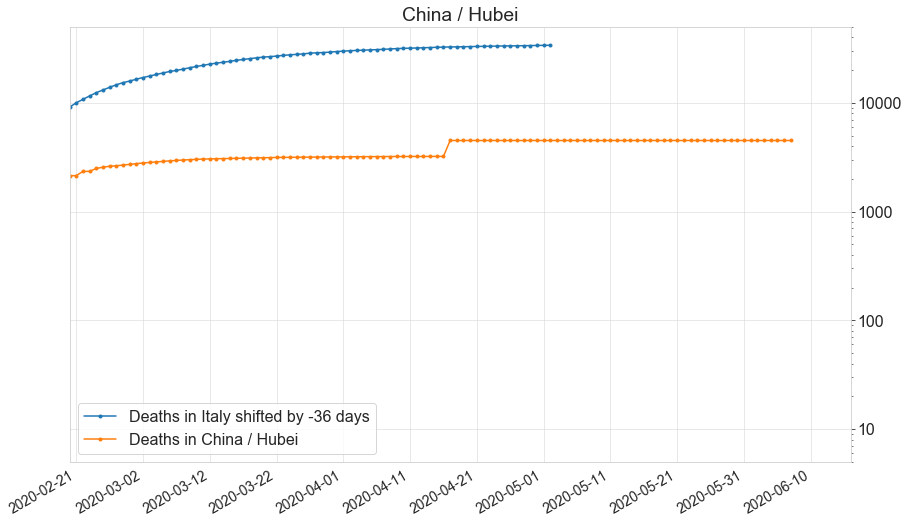

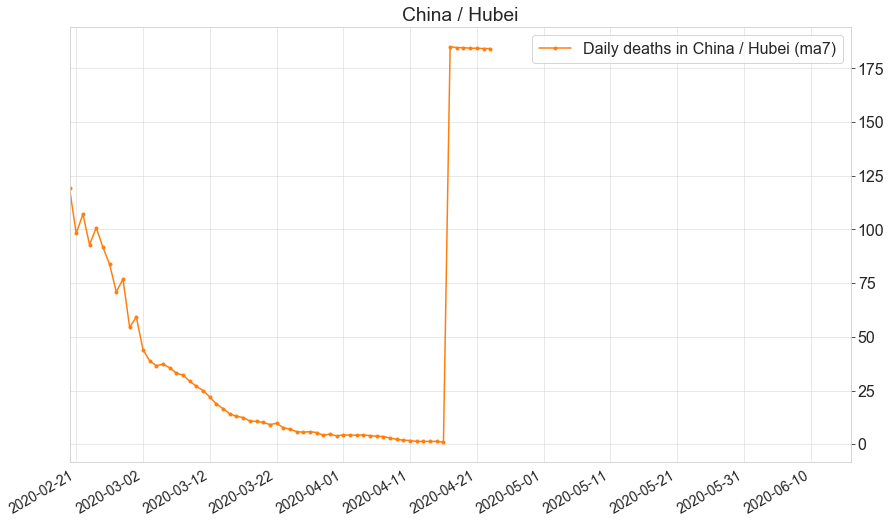

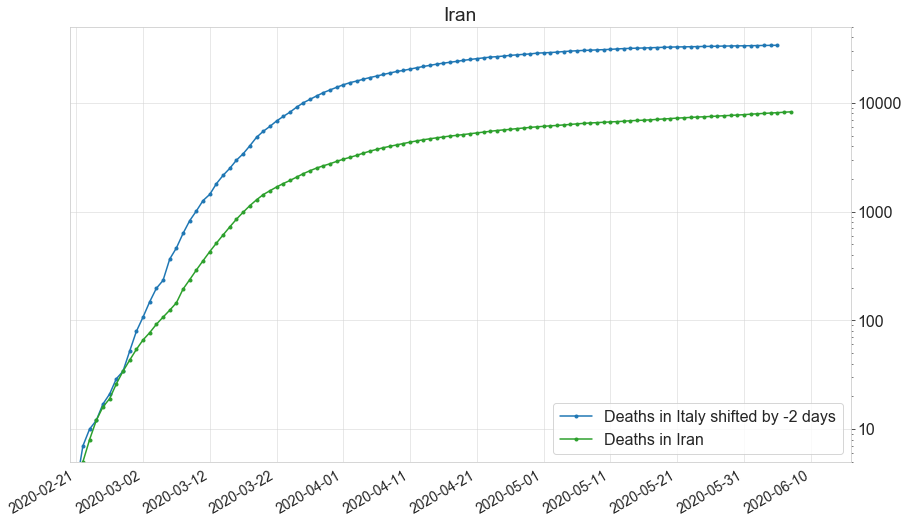

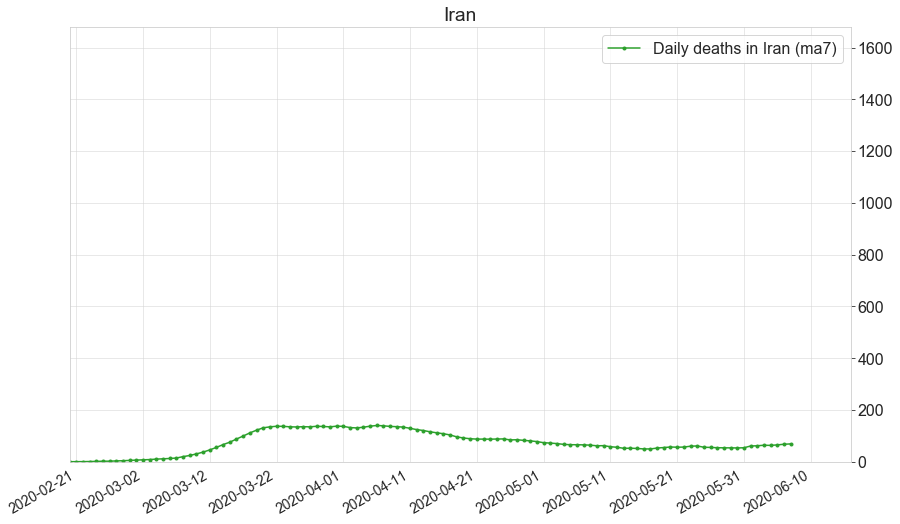

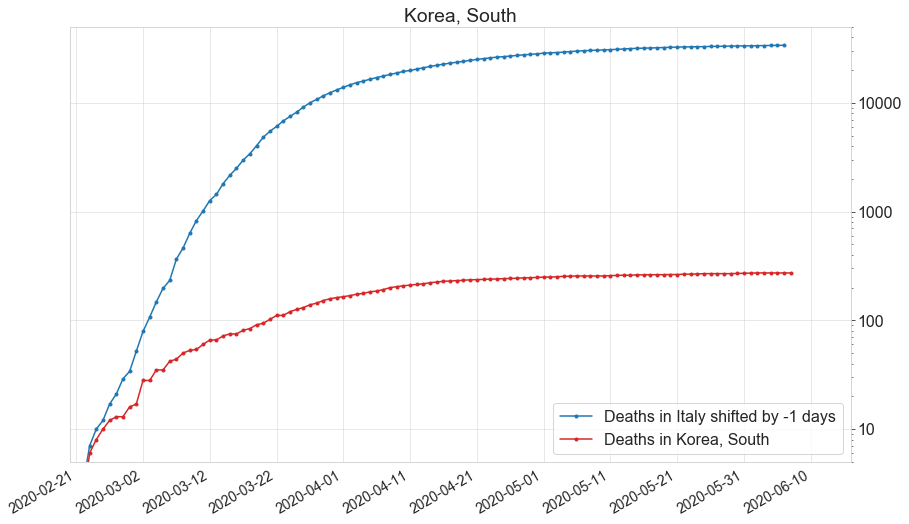

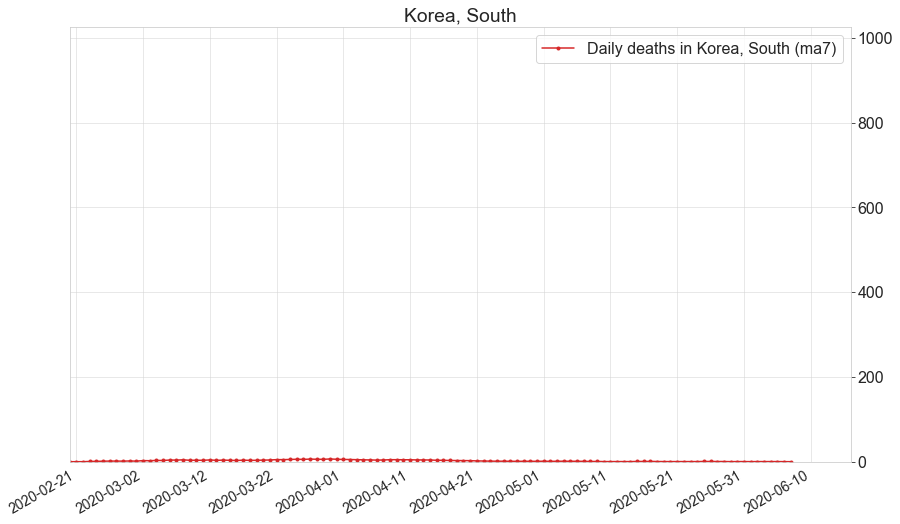

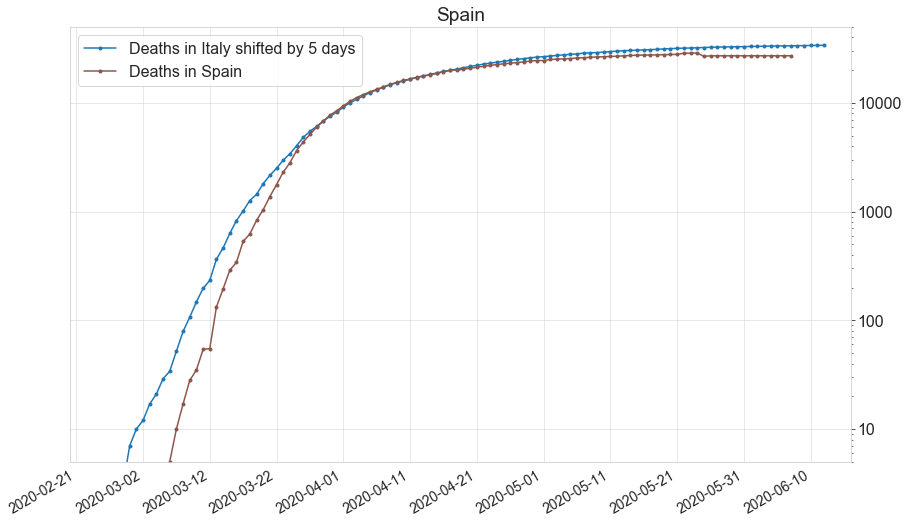

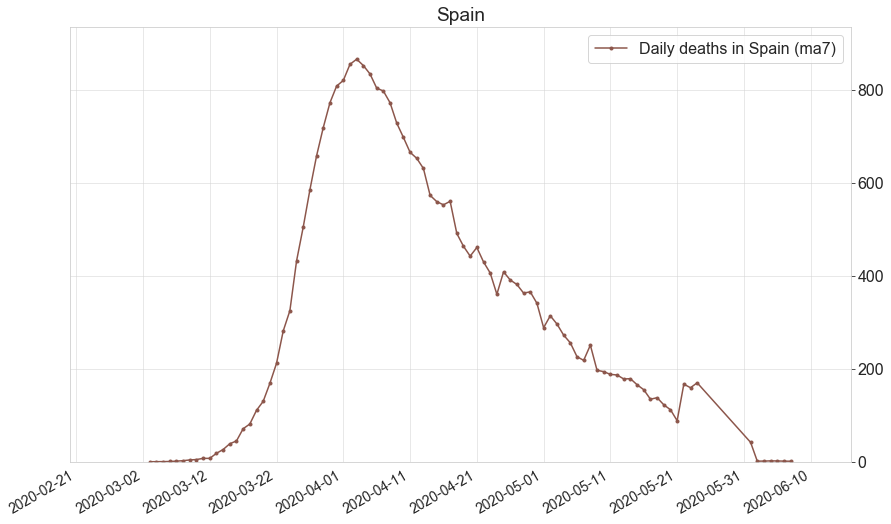

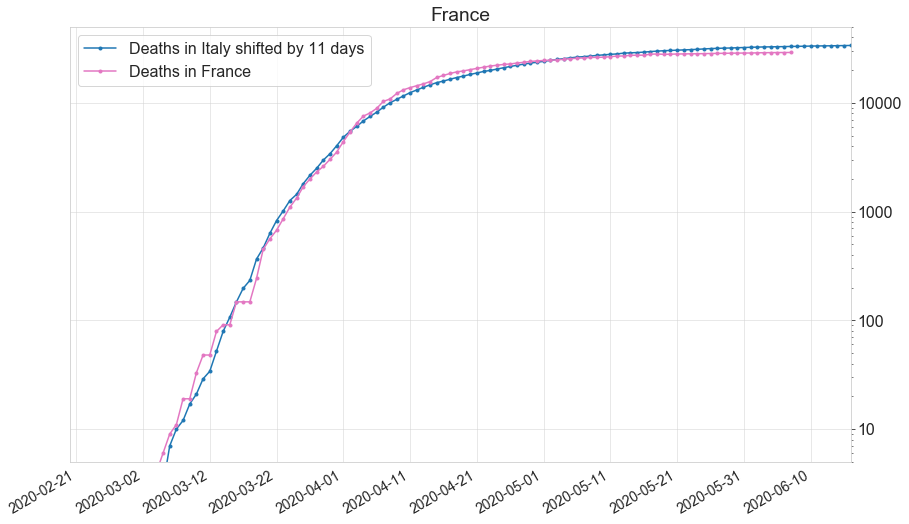

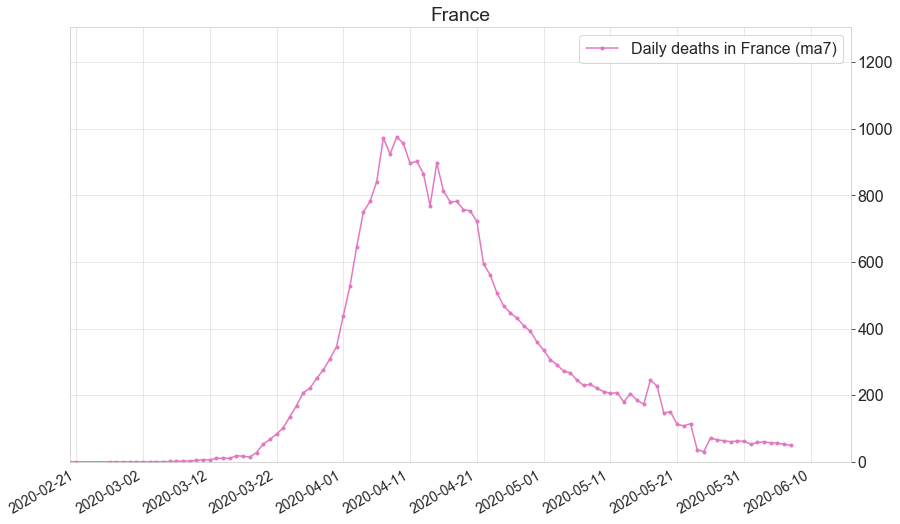

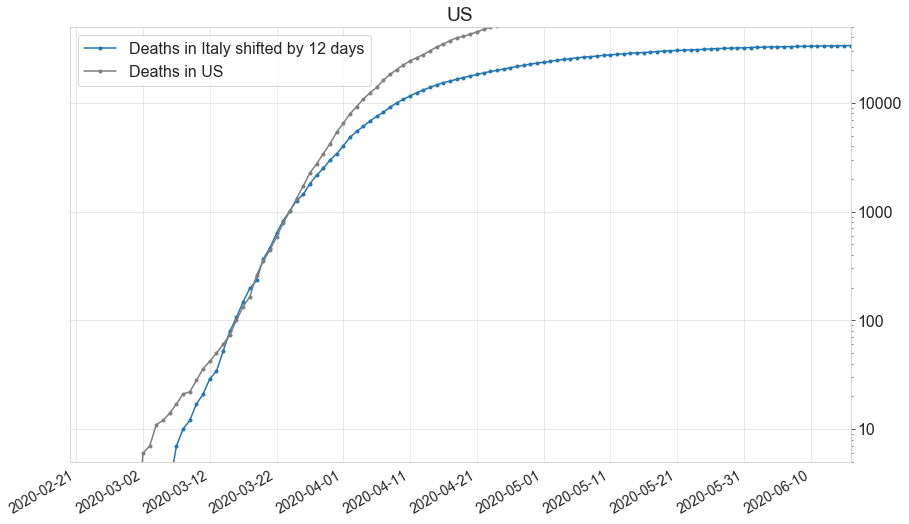

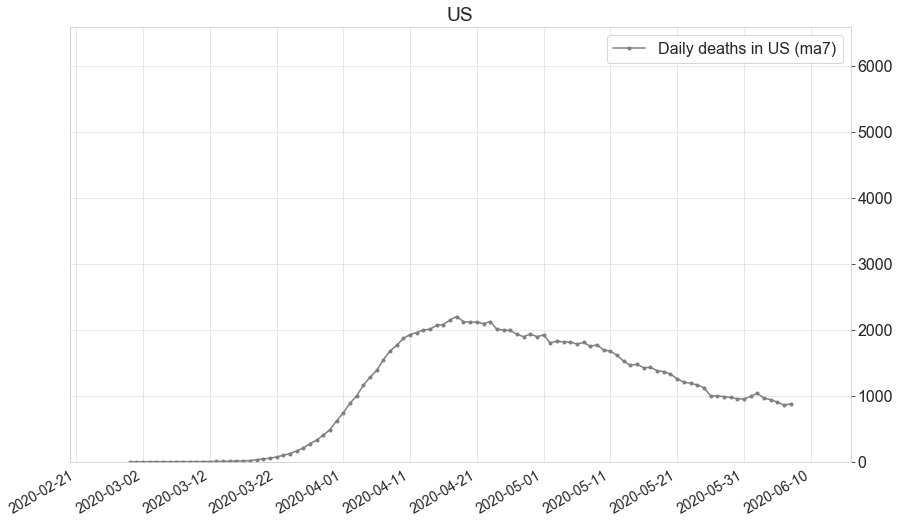

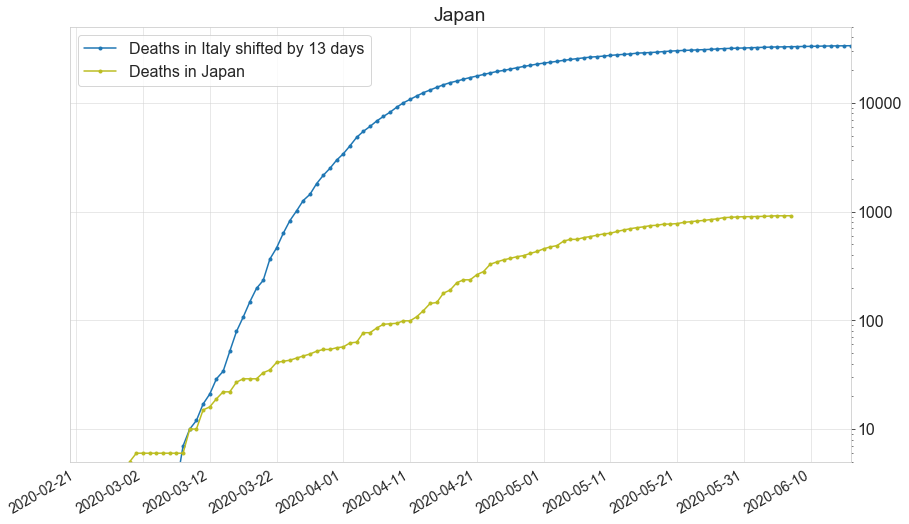

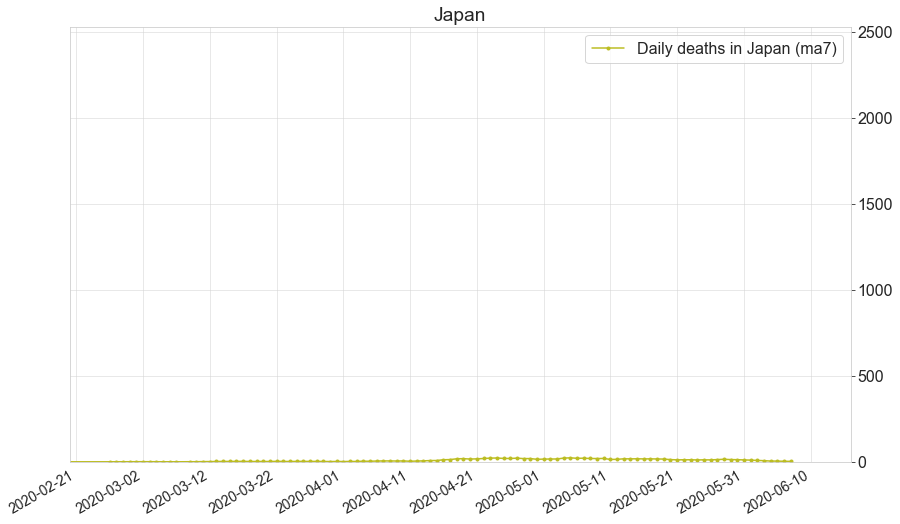

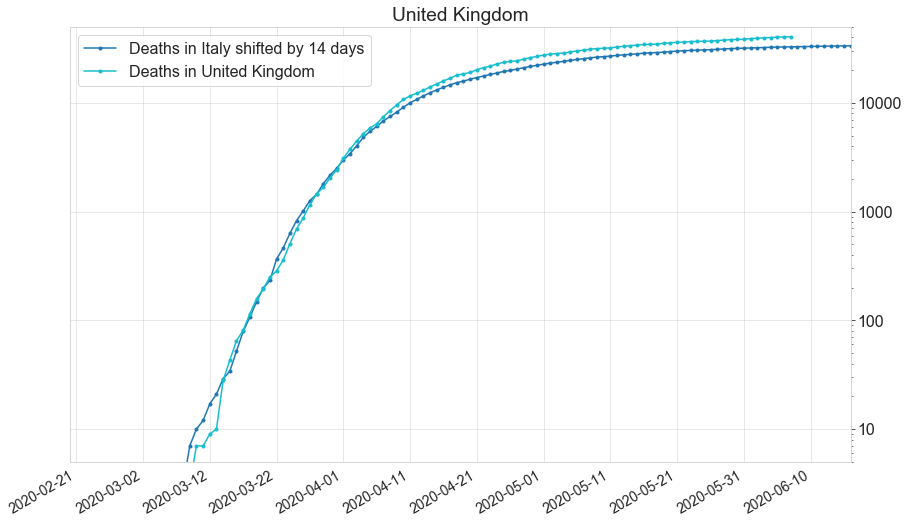

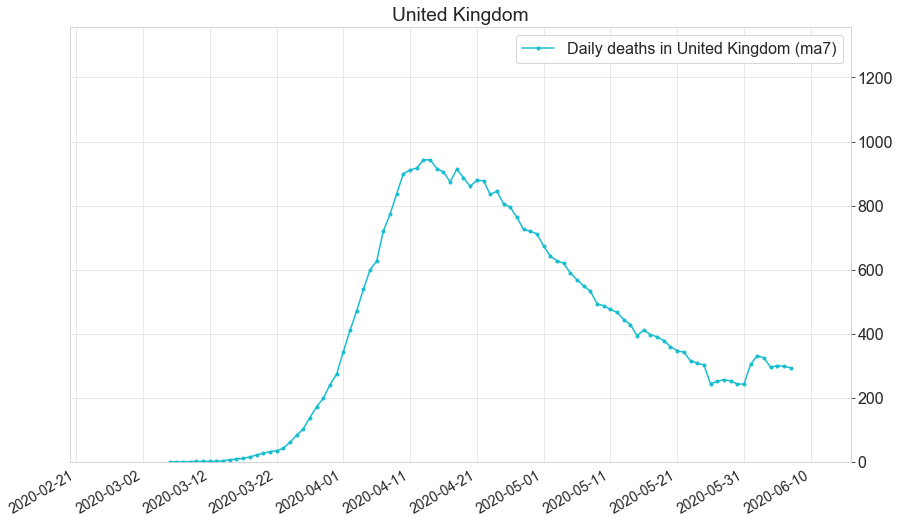

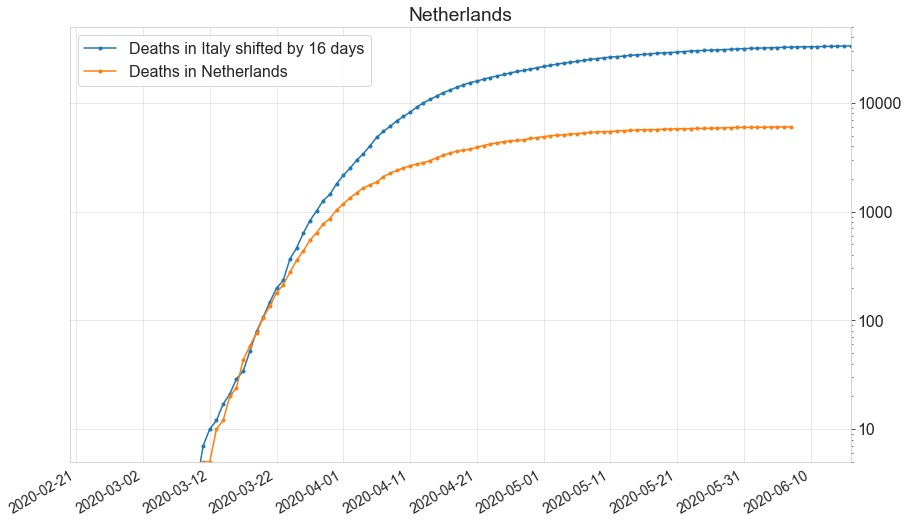

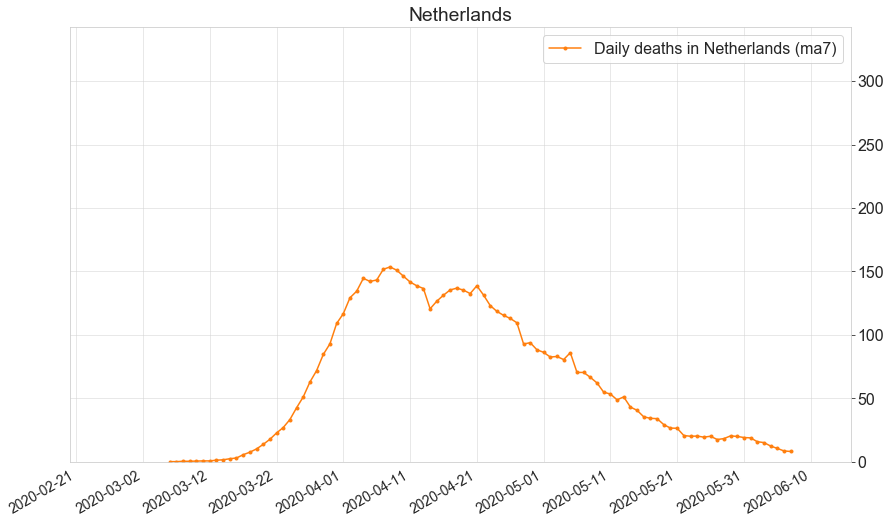

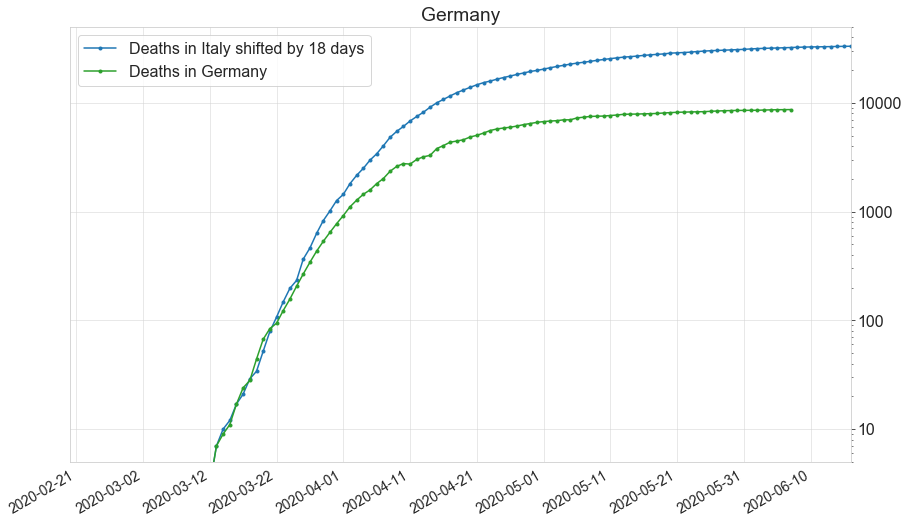

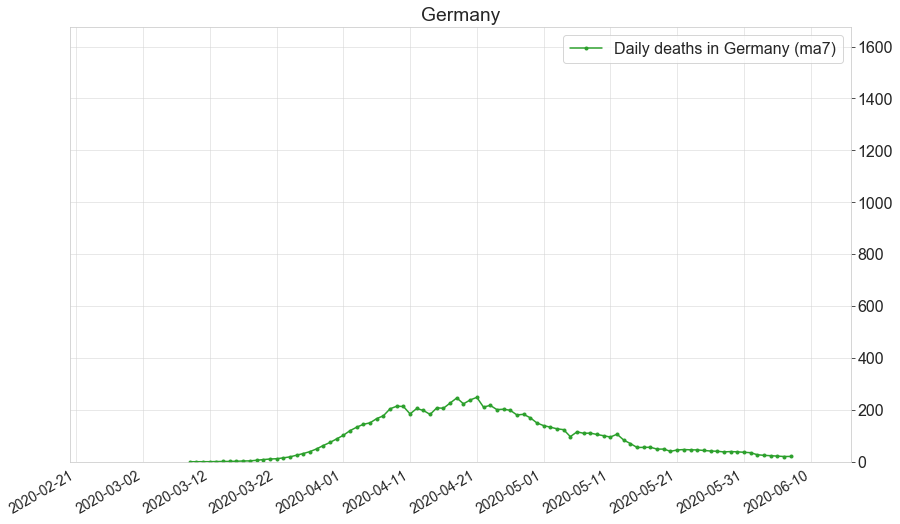

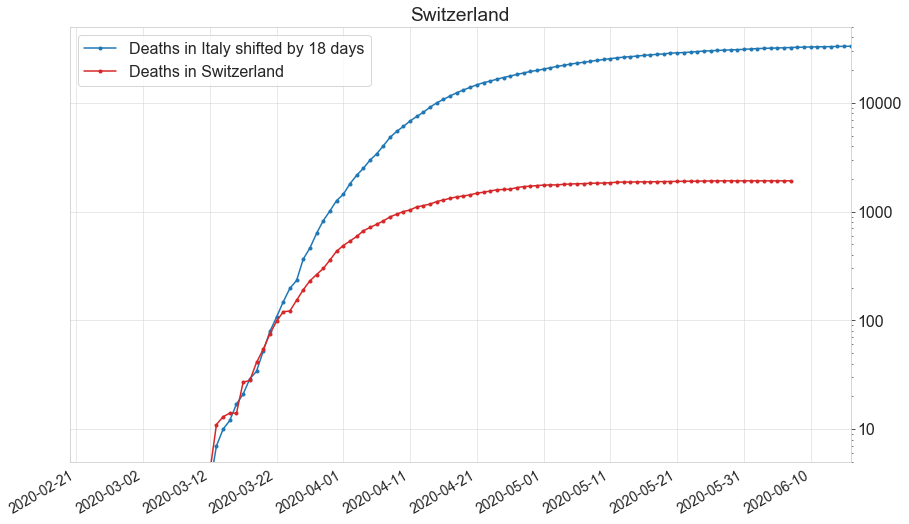

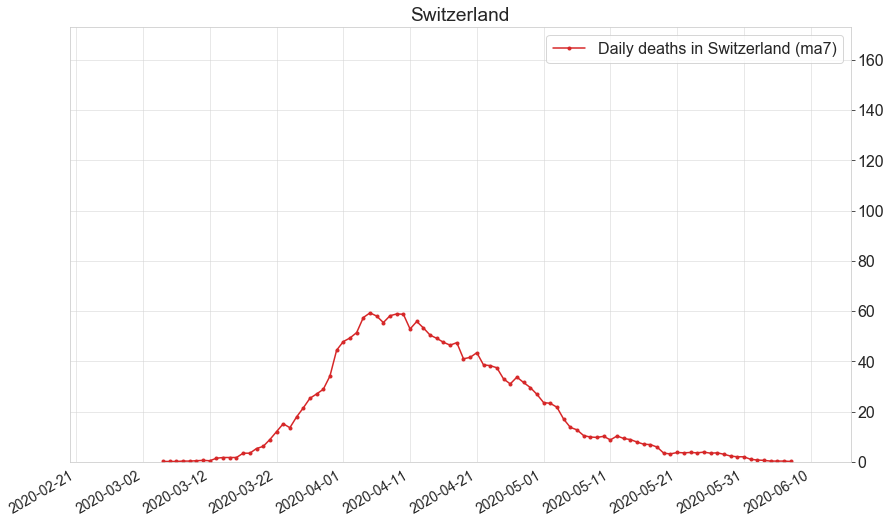

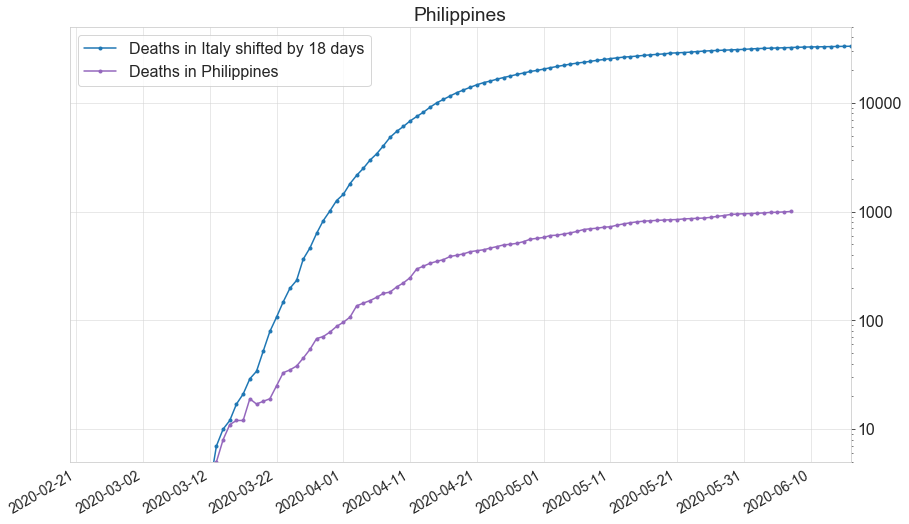

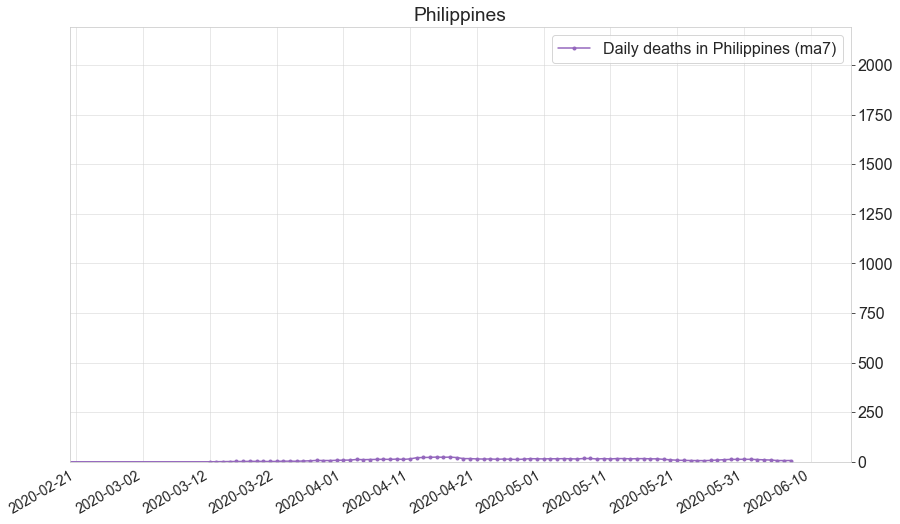

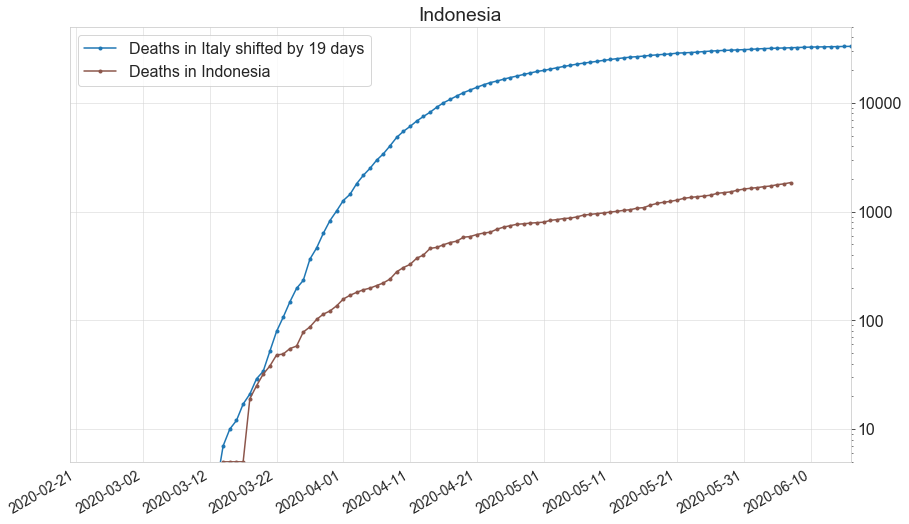

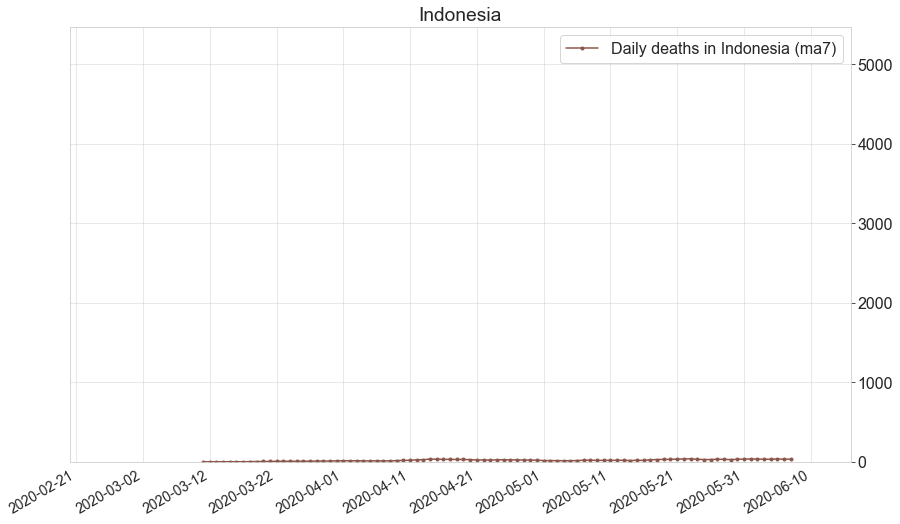

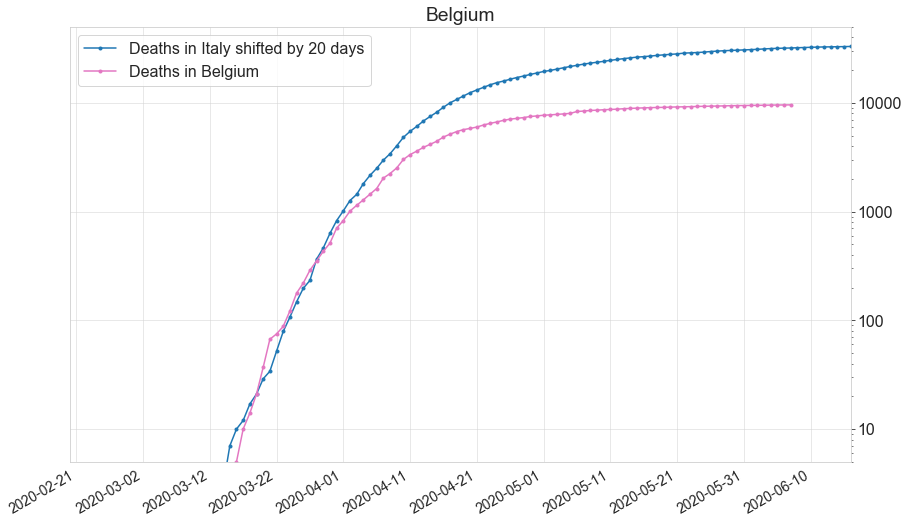

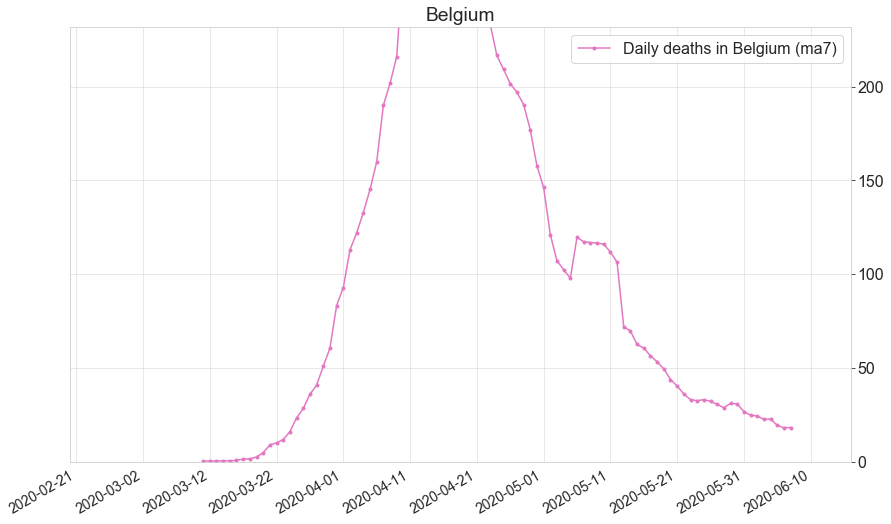

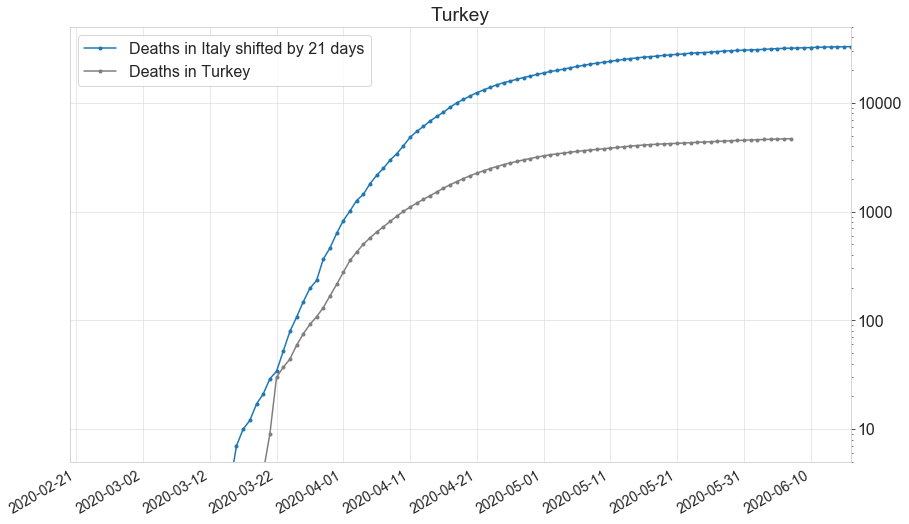

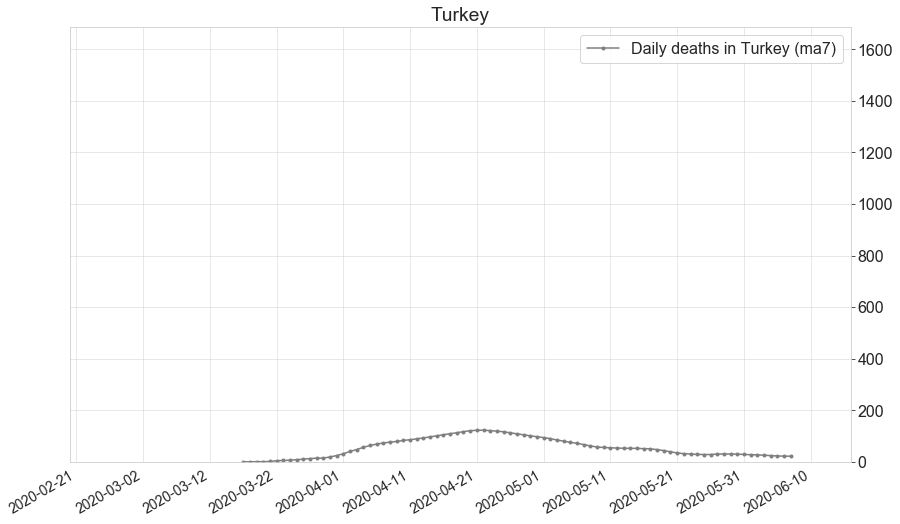

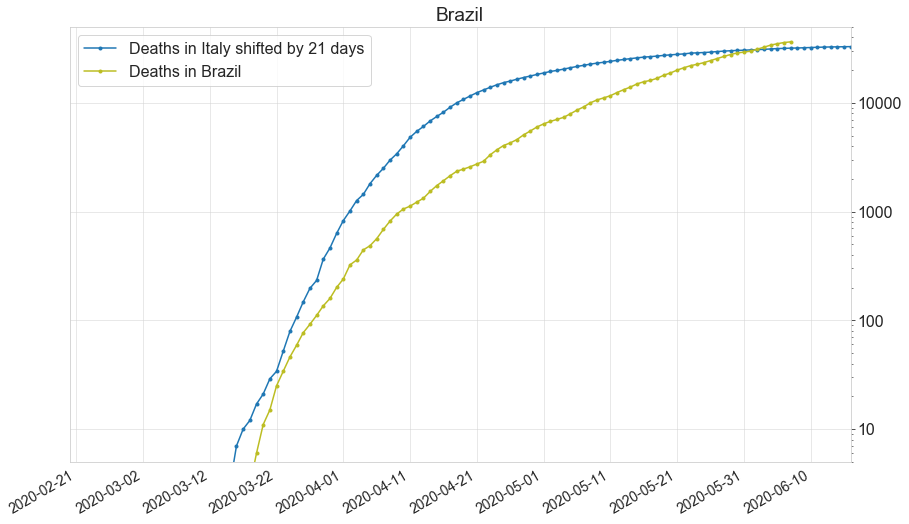

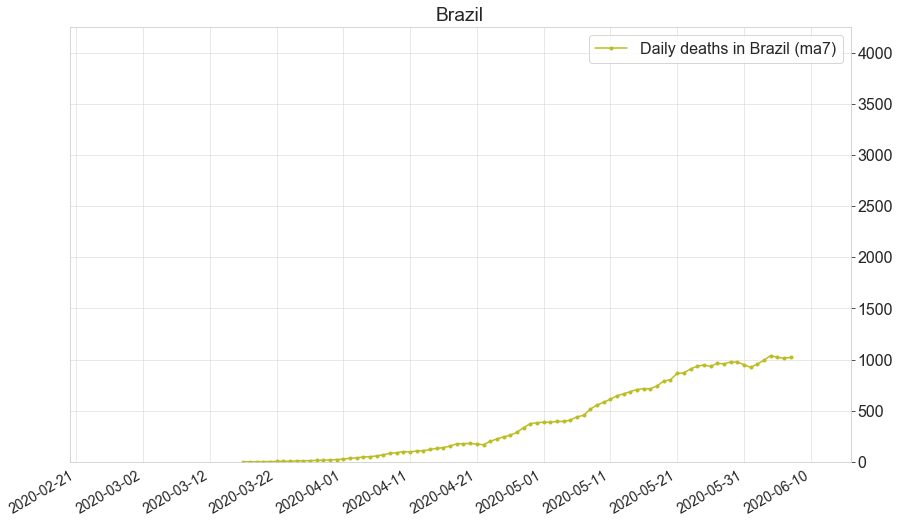

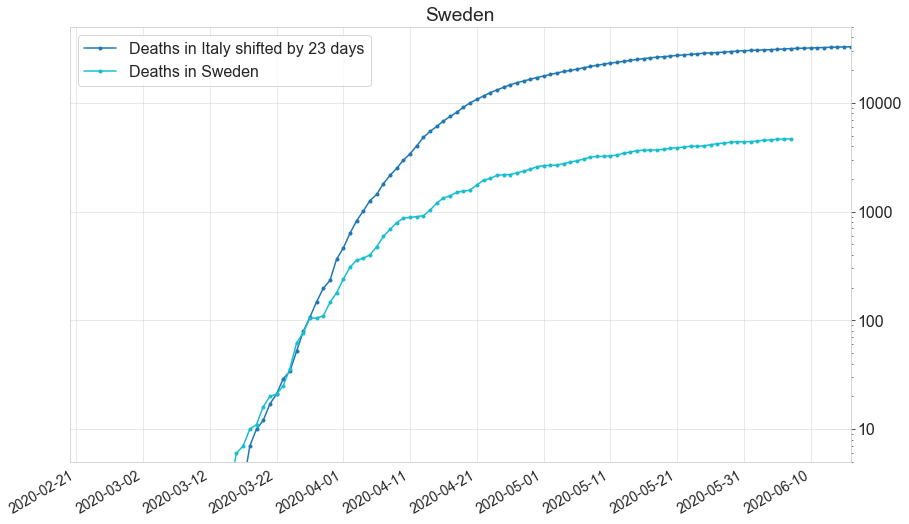

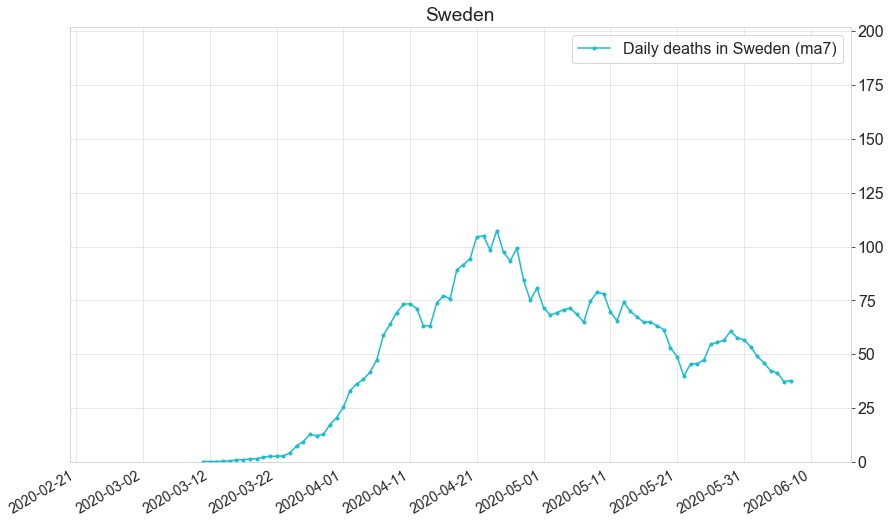

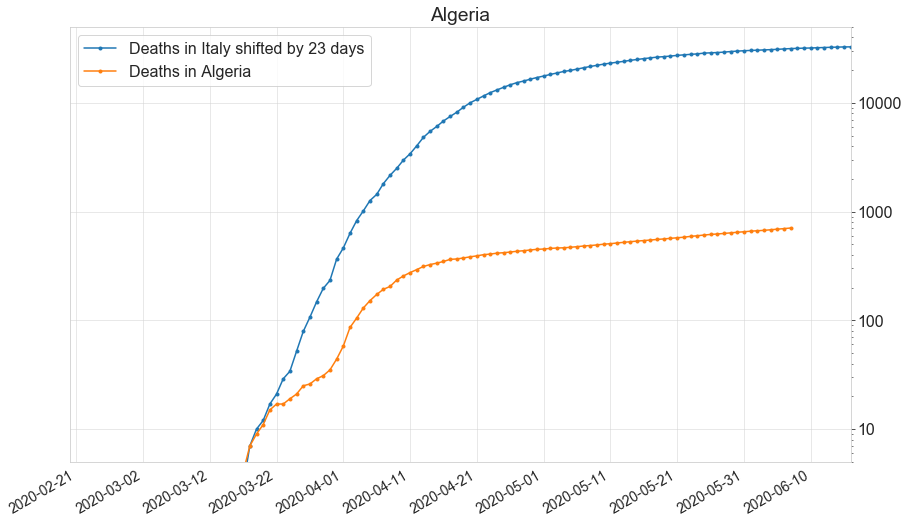

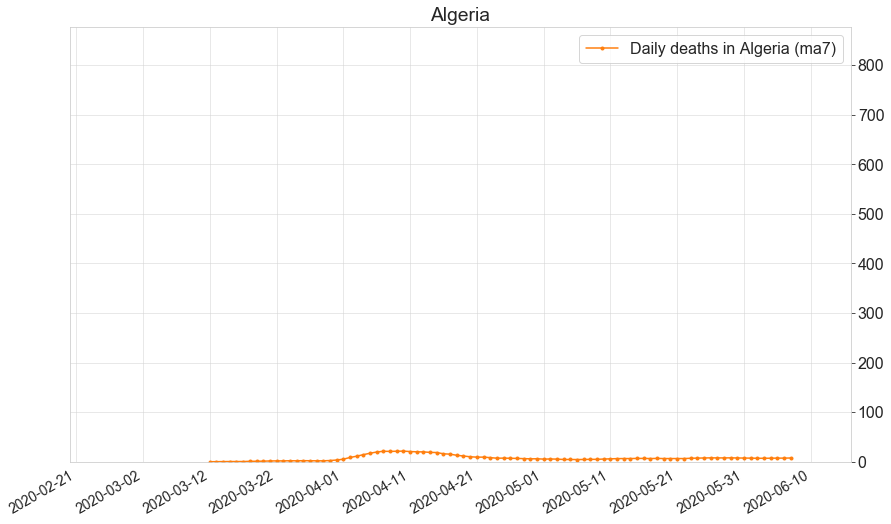

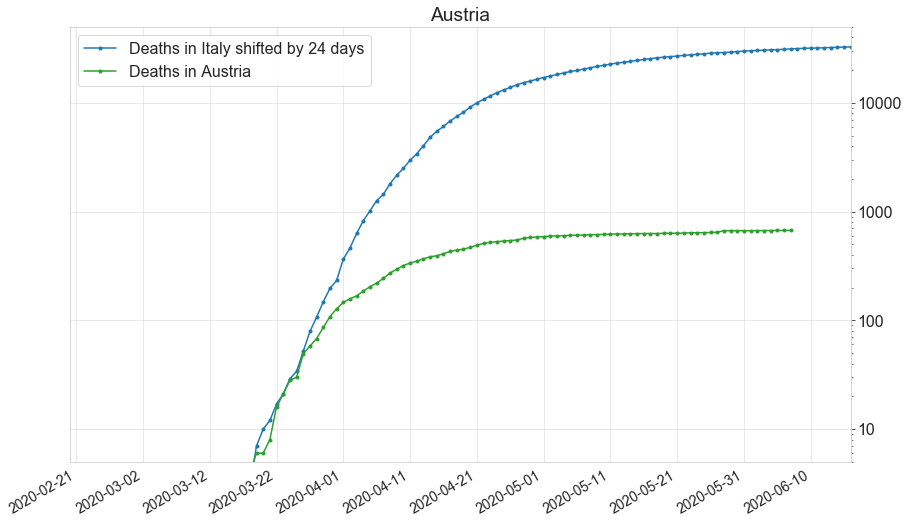

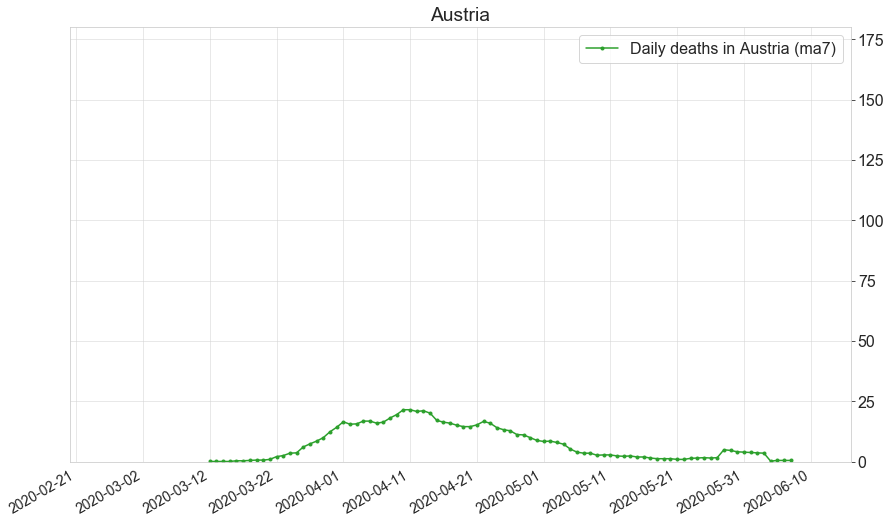

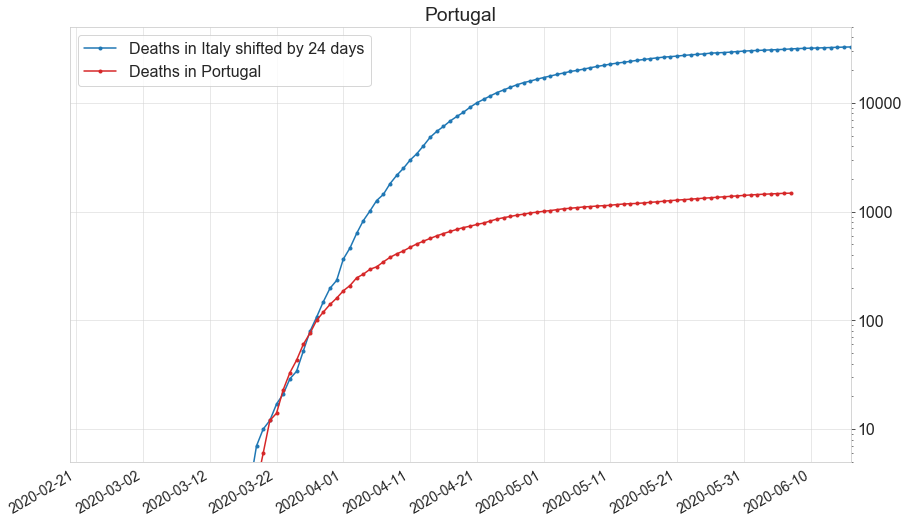

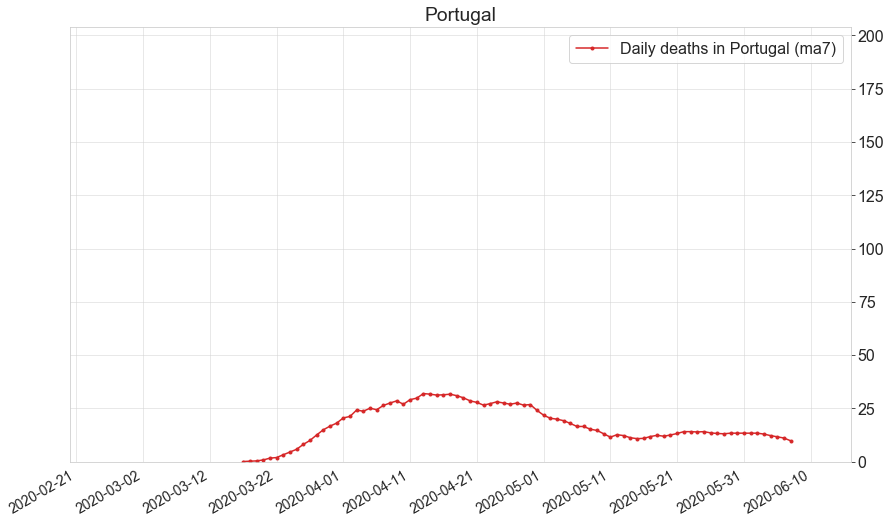

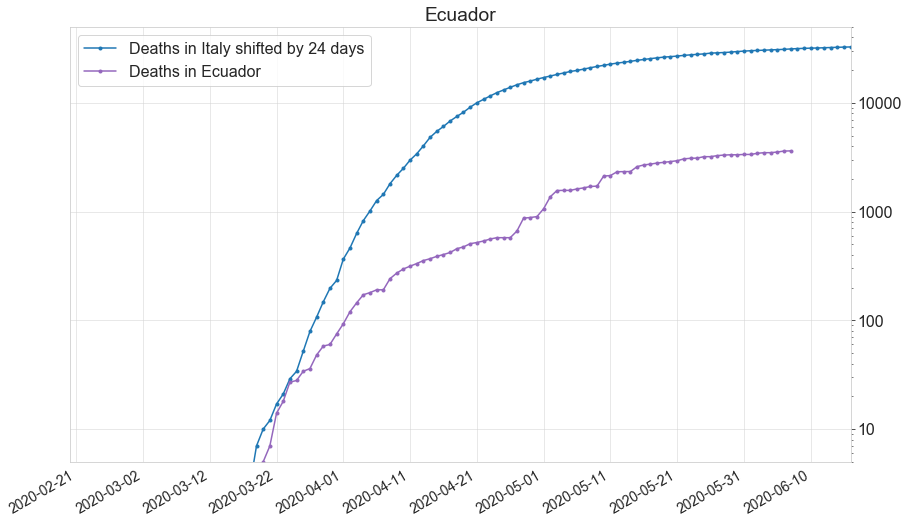

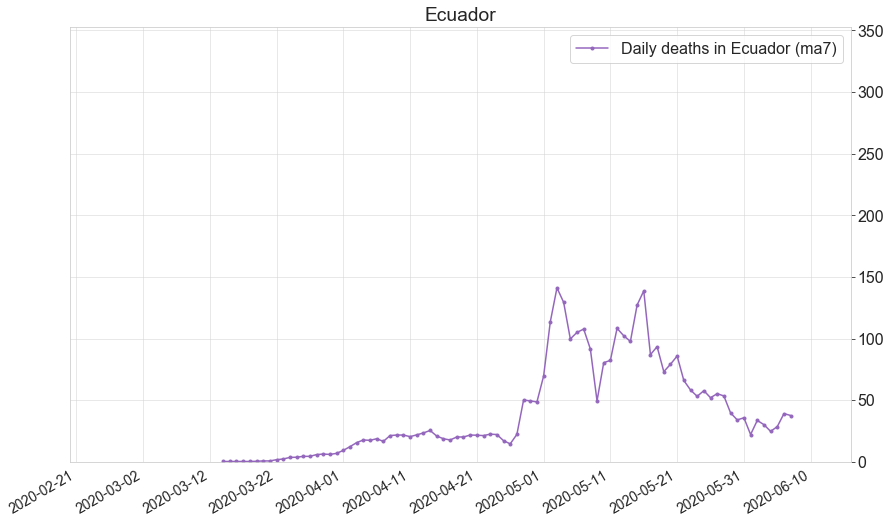

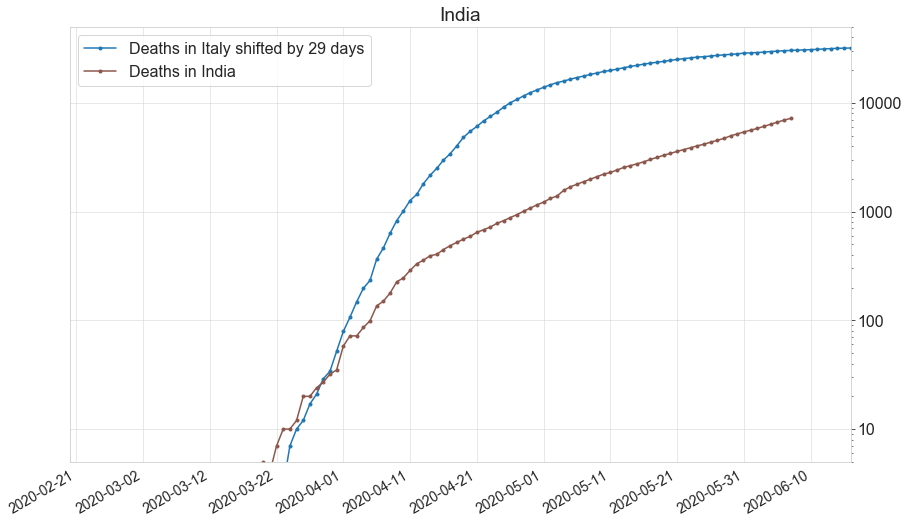

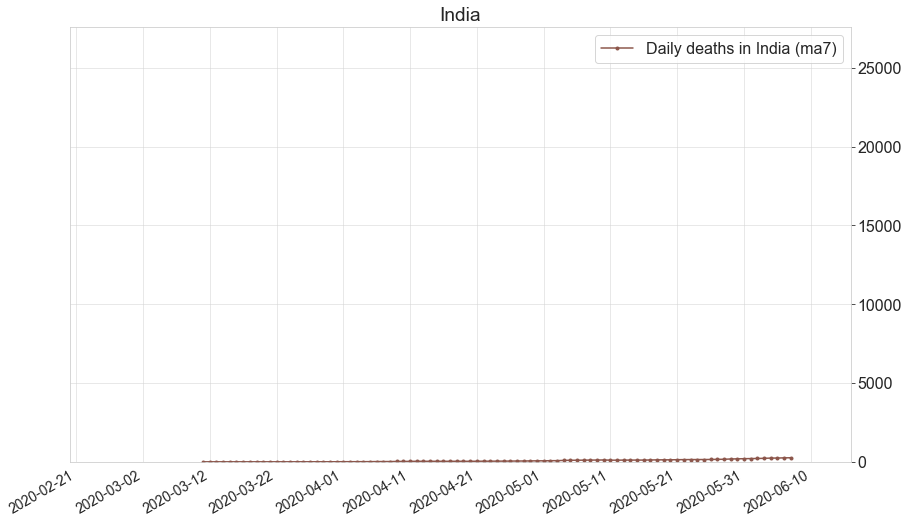

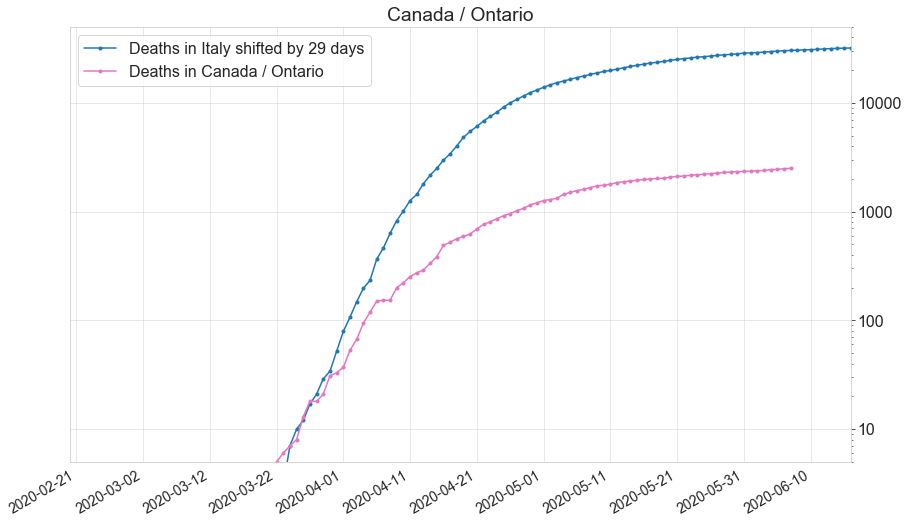

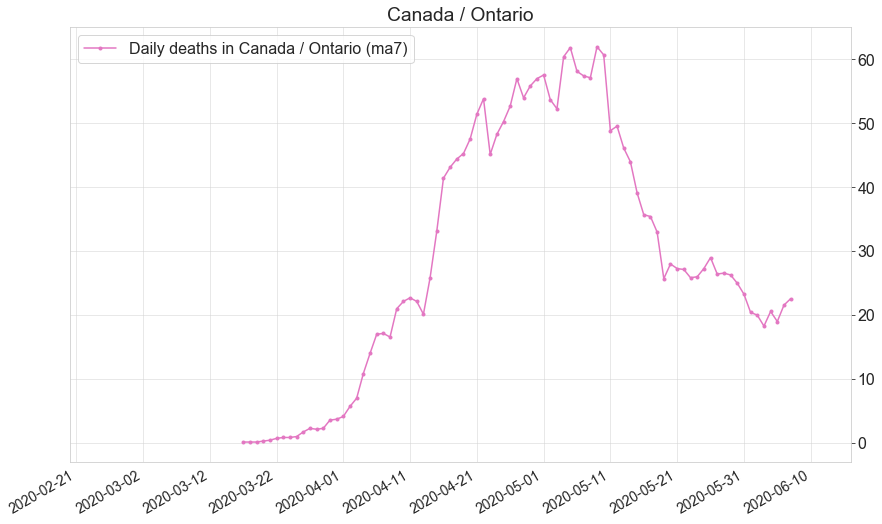

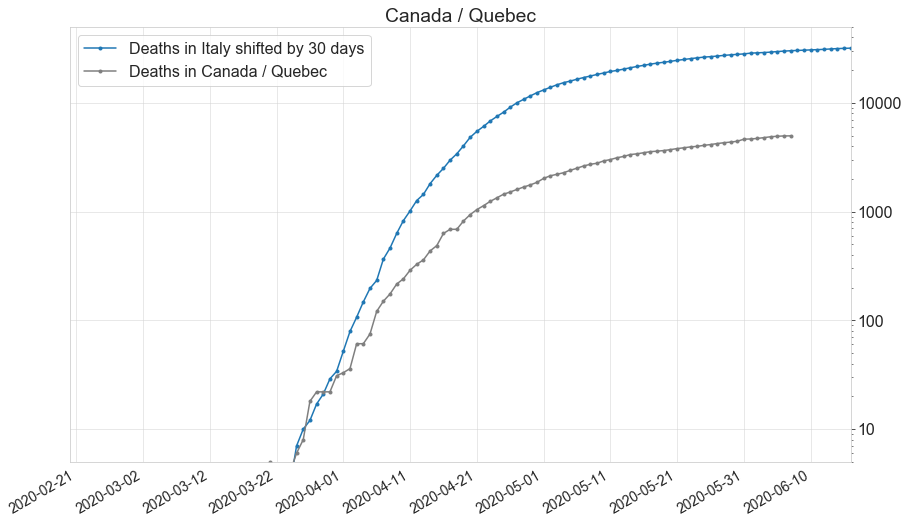

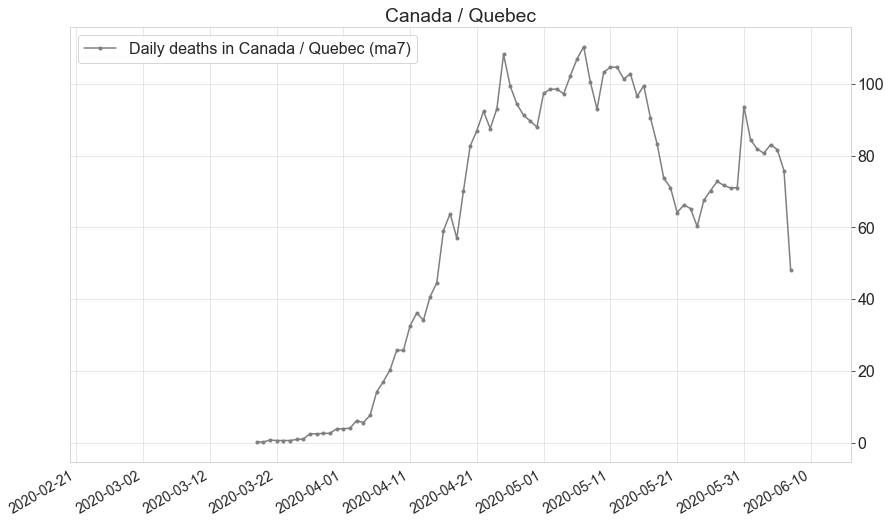

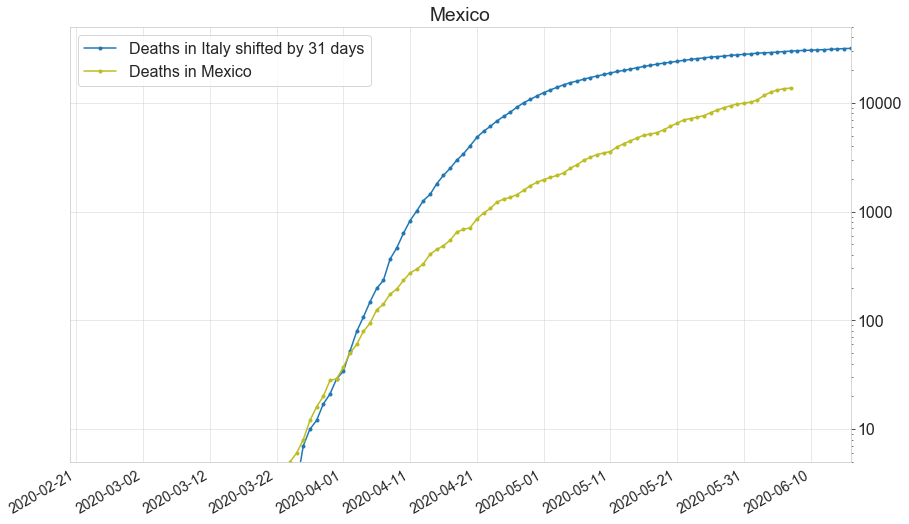

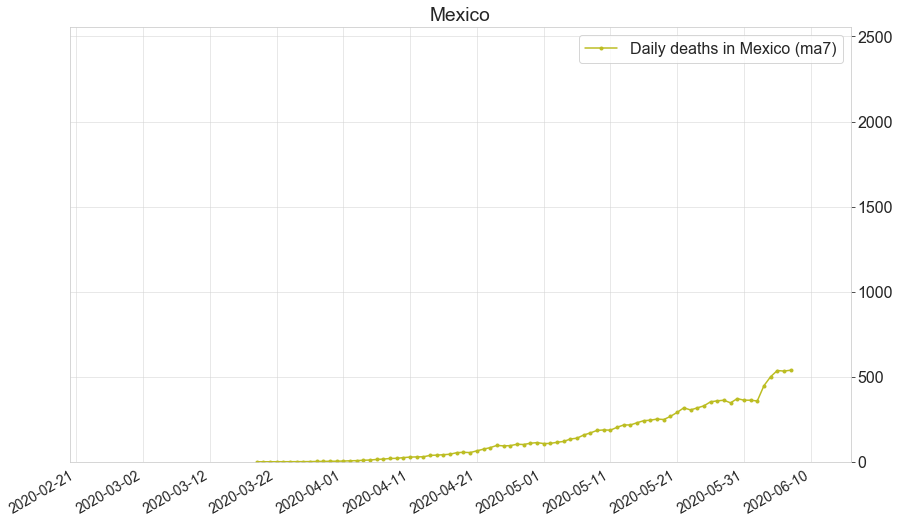

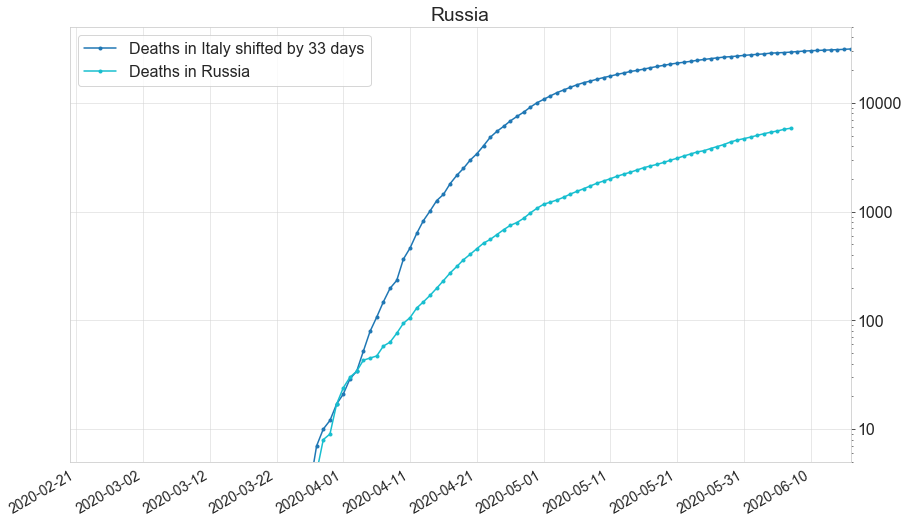

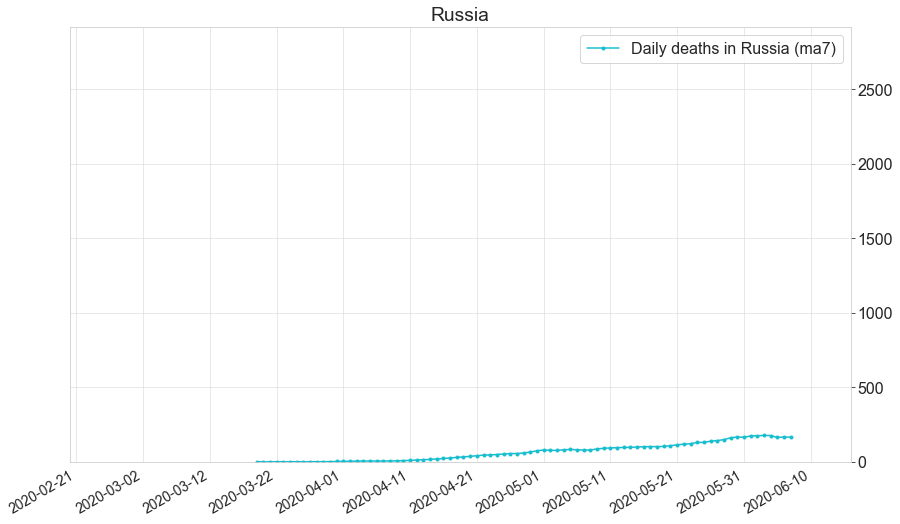

In [27]:
for (country, delay), color in list(zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:]))):
    if country == 'Italy':
        continue
    _, ax = covid19.plot.subplots(subplot_kw={
        'yscale': 'log',
        'ylim': (5, 50000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM,
    }, figsize=(14, 8))
    covid19.plot.plot_data(ax, world.sel(location='Italy')['deaths'], label=f'Deaths in Italy shifted by {delay} days', delay=delay, color=PALETTE_ONE[0])
    covid19.plot.plot_data(ax, world.sel(location=country)['deaths'], label=f'Deaths in {country}', color=color, date_interval=10)
    ax.set_title(f'{country}')
    ax.set(xlabel='', ylabel='')
    ax.legend()

    _, ax = covid19.plot.subplots(subplot_kw={
        # 'ylim': (1, 10000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM
    }, figsize=(14, 8))
    # covid19.plot.plot_data(ax, world.sel(location='Italy')['daily_deaths'].rolling({'time': 5}, center=True, min_periods=1).mean(), label=f'Daily deaths in Italy shifted by {delay} days', delay=delay, color=PALETTE_ONE[0])
    covid19.plot.plot_data(ax, world.sel(location=country)['daily_deaths7'], label=f'Daily deaths in {country} (ma7)', color=color, date_interval=10)
    ax.set_title(f'{country}')
    ax.set(xlabel='', ylabel='')
    ax.legend()
    try:
        ax.set(ylim=(0, world.sel(location=country).population.values / 50_000))
    except ValueError:
        pass